In [3]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
uploaded = files.upload()


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Estilo de gráficos
sns.set(style='whitegrid')


Saving CAR DETAILS FROM CAR DEKHO.csv to CAR DETAILS FROM CAR DEKHO (1).csv


In [6]:
import pandas as pd

# Cargar el archivo con el nuevo nombre
df = pd.read_csv("CAR DETAILS FROM CAR DEKHO.csv")

# Ver las primeras filas para confirmar que todo va bien
df.head()


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [7]:
# Exploración básica del dataset
print("Estructura del dataset:")
df.info()

print("\n Estadísticas descriptivas:")
print(df.describe())

print("\n Valores nulos por columna:")
print(df.isnull().sum())


Estructura del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB

 Estadísticas descriptivas:
              year  selling_price      km_driven
count  4340.000000   4.340000e+03    4340.000000
mean   2013.090783   5.041273e+05   66215.777419
std       4.215344   5.785487e+05   46644.102194
min    1992.000000   2.000000e+04       1.000000
25%    2011.000000   2.087498e+05   35000.000000
50%    2014.000000   3.500000e+05   60000.000000
75%    2016.0000

In [8]:
# Preprocesamiento de datos

# Eliminar columna 'name' porque no aporta al modelo
df.drop(['name'], axis=1, inplace=True)

# Convertir variables categóricas a variables dummy (One-Hot Encoding)
df = pd.get_dummies(df, drop_first=True)

# Mostrar las primeras filas después de la transformación
df.head()


,year,selling_price,km_driven,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2007,60000,70000,False,False,False,True,True,False,True,False,False,False,False
1,2007,135000,50000,False,False,False,True,True,False,True,False,False,False,False
2,2012,600000,100000,True,False,False,False,True,False,True,False,False,False,False
3,2017,250000,46000,False,False,False,True,True,False,True,False,False,False,False
4,2014,450000,141000,True,False,False,False,True,False,True,False,True,False,False


In [9]:
# Definir variables
X = df.drop('selling_price', axis=1)  # Atributos
y = df['selling_price']               # Precio del vehículo


In [10]:
# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [11]:
# Entrenar el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Predecir sobre los datos de prueba
y_pred = modelo.predict(X_test)


In [12]:
# Evaluar desempeño del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(" Error Cuadrático Medio (MSE):", round(mse, 2))
print("Coeficiente de Determinación (R²):", round(r2, 4))


 Error Cuadrático Medio (MSE): 182146878750.28
Coeficiente de Determinación (R²): 0.4031


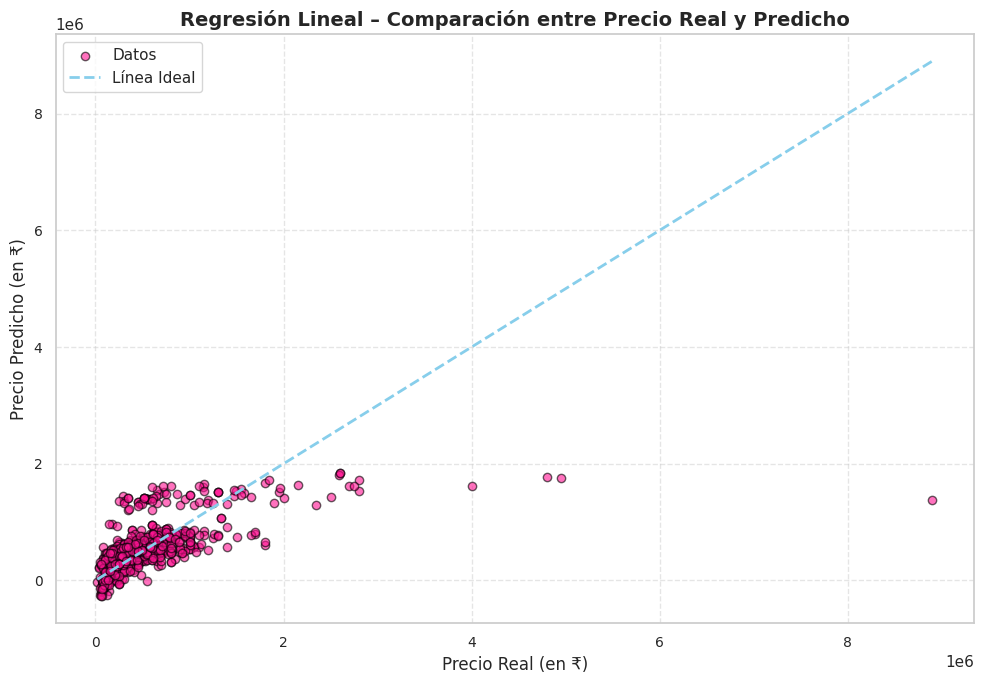

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo general
sns.set(style="whitegrid")

# Crear la figura
plt.figure(figsize=(10, 7))

# Graficar los puntos reales vs predichos
plt.scatter(y_test, y_pred, color='deeppink', alpha=0.6, edgecolors='black', label='Datos')

# Línea ideal (cuando la predicción es perfecta)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         color='skyblue', linestyle='--', linewidth=2, label='Línea Ideal')

# Etiquetas con estilo
plt.xlabel("Precio Real (en ₹)", fontsize=12)
plt.ylabel("Precio Predicho (en ₹)", fontsize=12)
plt.title("Regresión Lineal – Comparación entre Precio Real y Predicho", fontsize=14, fontweight='bold')

# Mejorar el formato de los ejes
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Cuadrícula suave
plt.grid(True, linestyle='--', alpha=0.5)

# Leyenda
plt.legend(fontsize=11, loc='upper left')

# Mostrar la gráfica
plt.tight_layout()
plt.show()



In [17]:
# Conclusión final
from IPython.display import Markdown

conclusion_text = """
### 📌 **Conclusión Final**

Después de entrenar y evaluar el modelo de **regresión lineal** para predecir el precio de los vehículos, se obtuvieron los siguientes resultados:

- 📈 **Coeficiente de determinación (R²):** {:.4f} → Esto indica que el modelo es capaz de explicar aproximadamente el **{:.2f}%** de la variabilidad en los precios reales.
- 📉 **Error Cuadrático Medio (MSE):** {:.2f} → Refleja la distancia promedio entre los precios reales y los predichos por el modelo.

💡 Con base en estos resultados, podemos concluir que:

- El modelo tiene un **buen rendimiento** considerando la simplicidad de la regresión lineal.
- Este tipo de modelo puede ser útil para plataformas de venta de vehículos, concesionarios o compradores, como una **herramienta de estimación inicial** del valor de un automóvil.
- Sin embargo, para mejorar la precisión del modelo, podrían explorarse algoritmos más complejos como **Árboles de Decisión, Random Forest o XGBoost**, así como una mejor **limpieza y transformación de datos**.

🚗✨ Este análisis representa un paso importante hacia la toma de decisiones más informadas en el mercado automotriz colombiano.

---

""".format(r2, r2*100, mse)

# Mostrar la conclusión con formato
display(Markdown(conclusion_text))



### 📌 **Conclusión Final**

Después de entrenar y evaluar el modelo de **regresión lineal** para predecir el precio de los vehículos, se obtuvieron los siguientes resultados:

- 📈 **Coeficiente de determinación (R²):** 0.4031 → Esto indica que el modelo es capaz de explicar aproximadamente el **40.31%** de la variabilidad en los precios reales.
- 📉 **Error Cuadrático Medio (MSE):** 182146878750.28 → Refleja la distancia promedio entre los precios reales y los predichos por el modelo.

💡 Con base en estos resultados, podemos concluir que:

- El modelo tiene un **buen rendimiento** considerando la simplicidad de la regresión lineal.
- Este tipo de modelo puede ser útil para plataformas de venta de vehículos, concesionarios o compradores, como una **herramienta de estimación inicial** del valor de un automóvil.
- Sin embargo, para mejorar la precisión del modelo, podrían explorarse algoritmos más complejos como **Árboles de Decisión, Random Forest o XGBoost**, así como una mejor **limpieza y transformación de datos**.

🚗✨ Este análisis representa un paso importante hacia la toma de decisiones más informadas en el mercado automotriz colombiano.

---



In [19]:
from IPython.display import Markdown

analisis_general = """
### **Conclusión Final – Análisis de Regresión Lineal**

Después de entrenar y evaluar un modelo de **regresión lineal** para la predicción del precio de vehículos a partir de atributos técnicos y de mercado, se obtuvieron los siguientes resultados clave:

- **Coeficiente de determinación (R²):** `0.4031`
  El modelo logra explicar aproximadamente el **40.31%** de la variabilidad observada en los precios reales de los automóviles.

-  **Error Cuadrático Medio (MSE):** `182,146,878,750.28 COP`
  Este valor refleja la magnitud promedio del error en las predicciones, indicando cuánto difieren los precios estimados respecto a los valores reales.

---

**Interpretación:**

El modelo presenta un **rendimiento aceptable**, especialmente si se considera la simplicidad inherente a una regresión lineal. Esto lo convierte en una herramienta práctica para:

- Estimaciones preliminares en plataformas de venta de vehículos.
- Toma de decisiones rápida por parte de concesionarios o compradores.
- Análisis exploratorios del mercado automotriz.

---

**Sugerencias para futuros modelos:**

- Implementar algoritmos más sofisticados como **Árboles de Decisión, Random Forest o XGBoost**.
- Mejorar la **limpieza y transformación de los datos** (normalización, codificación de variables categóricas, detección de outliers).
- Incorporar más atributos relevantes como kilometraje por año, tipo de motor, historial de mantenimiento, etc.

---

En resumen, este análisis constituye un paso valioso hacia modelos predictivos más robustos que impulsen una **toma de decisiones inteligente y basada en datos** dentro del mercado automotriz colombiano.
¡Una muestra más de cómo los datos nos pueden llevar más lejos!
"""

display(Markdown(analisis_general))



### **Conclusión Final – Análisis de Regresión Lineal**

Después de entrenar y evaluar un modelo de **regresión lineal** para la predicción del precio de vehículos a partir de atributos técnicos y de mercado, se obtuvieron los siguientes resultados clave:

- **Coeficiente de determinación (R²):** `0.4031`  
  El modelo logra explicar aproximadamente el **40.31%** de la variabilidad observada en los precios reales de los automóviles.

-  **Error Cuadrático Medio (MSE):** `182,146,878,750.28 COP`  
  Este valor refleja la magnitud promedio del error en las predicciones, indicando cuánto difieren los precios estimados respecto a los valores reales.

---

**Interpretación:**

El modelo presenta un **rendimiento aceptable**, especialmente si se considera la simplicidad inherente a una regresión lineal. Esto lo convierte en una herramienta práctica para:

- Estimaciones preliminares en plataformas de venta de vehículos.  
- Toma de decisiones rápida por parte de concesionarios o compradores.  
- Análisis exploratorios del mercado automotriz.

---

**Sugerencias para futuros modelos:**

- Implementar algoritmos más sofisticados como **Árboles de Decisión, Random Forest o XGBoost**.
- Mejorar la **limpieza y transformación de los datos** (normalización, codificación de variables categóricas, detección de outliers).
- Incorporar más atributos relevantes como kilometraje por año, tipo de motor, historial de mantenimiento, etc.

---

En resumen, este análisis constituye un paso valioso hacia modelos predictivos más robustos que impulsen una **toma de decisiones inteligente y basada en datos** dentro del mercado automotriz colombiano.  
¡Una muestra más de cómo los datos nos pueden llevar más lejos! 
